In [10]:
import pandas as pd

In [11]:
df=pd.read_csv("dataframe_.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [12]:
df.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


In [13]:
df.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


In [14]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [15]:
df.shape

(1697, 2)

In [16]:
df.dropna()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


In [21]:
df['input']=df['input'].fillna(df['input'].mean())
df['output']=df['output'].fillna(df['output'].mean())

In [22]:
y=df['input']
X=df[['output']]

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [24]:
from sklearn .linear_model import LinearRegression
model=LinearRegression()

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
model.intercept_

20.932014850770752

In [27]:
model.coef_

array([0.59753798])

In [28]:
y_predict=model.predict(X_test)

In [29]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_predict)

3.301214508267982

In [30]:
import statsmodels.api as sm

In [31]:
X1=sm.add_constant(X)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [32]:
model=sm.OLS(y,X1)

In [33]:
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                  input   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     601.5
Date:                Sat, 11 Feb 2023   Prob (F-statistic):          6.28e-114
Time:                        08:36:44   Log-Likelihood:                -9564.3
No. Observations:                1697   AIC:                         1.913e+04
Df Residuals:                    1695   BIC:                         1.914e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.1158      1.856     11.915      0.0

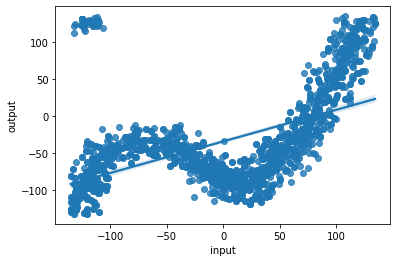

In [36]:
import seaborn as sns
sns.regplot(x='input',y='output',data=df)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
np.random.seed(2529)

n=25

x=np.random.normal(size=n)
y=x+np.random.normal(scale=0.3, size=n)

x1=x+np.random.normal(scale=0.1, size=n)
x2=x+np.random.normal(scale=0.1, size=n)
x3=x+np.random.normal(scale=0.1, size=n)

X=np.column_stack((x1,x2,x3))

In [39]:
np.corrcoef(x1,x2)

array([[1.        , 0.99619448],
       [0.99619448, 1.        ]])

In [40]:
np.corrcoef(x1,x3)

array([[1.        , 0.99581395],
       [0.99581395, 1.        ]])

In [41]:
np.corrcoef(x2,x3)

array([[1.        , 0.99366715],
       [0.99366715, 1.        ]])

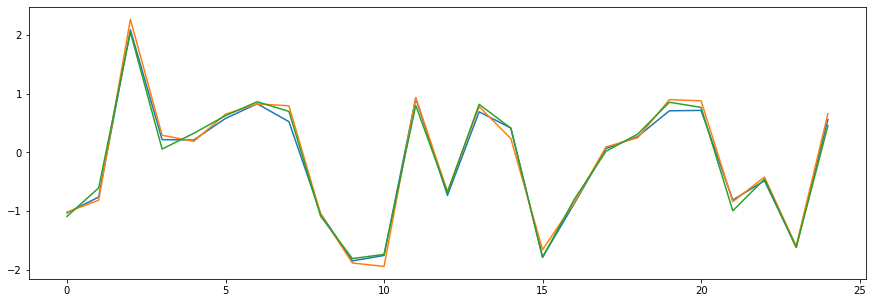

In [44]:
fig, ax=plt.subplots(figsize=(15,5))
ax.plot(X)

In [45]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)
model.score(X,y)

0.930844385171685

In [46]:
from sklearn.model_selection import cross_val_score
cv=cross_val_score(model, X, y, cv=10)
cv.mean()

-0.8727259058264136

Here the problem is that we introduce highly correlated features and so the model severly overfits